In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [3]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'mds_1sec_2wayOnly'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'compute_mds', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'compute_mds_3d', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_mds', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_mds_3d', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_mds_trajectory', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'get_euclid_dist', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The 

In [13]:
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [25]:
sessions = 'post',

In [26]:
pre_animals  = 'c3m1', 'c3m2', 'c3f3','c10m8'
post_animals = '90','90_475','91','93_500','93_580','93_720','93_810'

In [27]:
##find animals common to both sessions
#prepost_animals = np.intersect1d(pre_animals, post_animals)

In [28]:
for sess in sessions:

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [29]:
#prepost_patterns_CS_pre = load_all_animals_vars('patterns_CS_evs_pre_post_1s', prepost_animals, '', notebook='decoding_all')             
#prepost_patterns_CS_post = load_all_animals_vars('patterns_CS_evs_post_pre_1s', prepost_animals, '', notebook='decoding_all')
#prepost_patterns_pre = load_all_animals_vars('patterns_evs_pre_post_1s', prepost_animals, '', notebook='decoding_all')             
#prepost_patterns_post = load_all_animals_vars('patterns_evs_post_pre_1s', prepost_animals, '', notebook='decoding_all')
#prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='decoding_all')
#prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='decoding_all')

In [30]:
from sklearn.manifold import MDS
mds = MDS()

In [31]:
#def plot_linear_decoder(ax, patterns, labels_comb, decoder, **args):
#    
#    xmin, xmax, _, _ = ax.axis()
#    decoder.fit(patterns, labels_comb)
#    x = np.r_[np.min(patterns), np.max(patterns)]
#    a = decoder.coef_[0]
#    b = decoder.coef0
#    ax.plot([xmin, xmax], [-(a[0]*xmin-b)/a[1], -(a[0]*xmax-b)/a[1]], **args)

In [32]:
from sklearn.svm import SVC

In [33]:
import time

In [34]:
for sess in sessions:
    for t in range(14):
        exec('patterns_tb_%s_%s = {}'%(t, sess))
        for ani in eval('%s_animals'%sess):
            try:
                print sess,
                print ani,
                exec("patterns_tb_%s_%s['%s'] = patterns_tb_%s['%s'][%s]"%(t,sess,ani,sess,ani,t))
            except IOError as error:
                print error
            continue

post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post 90 post

In [7]:
def compute_mds(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    md = mds.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb
    

In [51]:
%%time
n_loop = 100
n_patterns = 100

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(14):
        exec("patterns_tb_%s_%s_all_mds = np.r_[[compute_mds(patterns_tb_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(t,sess,t,sess,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
#for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
#compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
_,labels_comb = ut.combine_patterns(patterns_tb_5_post, labels_post,n_patterns=n_patterns,classes=[1,2,3,4])

0 post 357.9 sec 1 post 748.7 sec 2 post 1139.1 sec 3 post 1530.3 sec 4 post 1923.5 sec 5 post 2351.9 sec 6 post 2948.5 sec 7 post 3507.6 sec 8 post 4099.1 sec 9 post 4778.9 sec 10 post 5446.3 sec 11 post 6093.8 sec 12 post 6713.9 sec 13 post 7315.0 secCPU times: user 1d 9h 31min 22s, sys: 3h 2min 6s, total: 1d 12h 33min 28s
Wall time: 2h 1min 55s



In [52]:
#get mean of loops
for sess in sessions:
    for t in range(14):
        exec("patterns_tb_%s_%s_all_mds_mean = np.mean([patterns_tb_%s_%s_all_mds[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds))],axis=0)"%(t,sess,t,sess,t,sess))
        exec("patterns_tb_%s_%s_all_mds_std = np.std([patterns_tb_%s_%s_all_mds[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds))],axis=0)"%(t,sess,t,sess,t,sess))

In [8]:
def compute_mds_3d(patterns_post, labels_post, n_patterns=50,classes=[1,2,3,4]):
    
    patterns_comb_post, labels_comb = ut.combine_patterns(patterns_post, labels_post, n_patterns=n_patterns,classes=classes)                                          
    mds3d = MDS(n_components=3)
    md = mds3d.fit_transform(patterns_comb_post)
    #print md.shape
    #print labels_comb.shape
    return md#, labels_comb

In [ ]:
%%time
n_loop = 100
n_patterns = 50

ti0 = time.time()
for sess in sessions:
    #begin at CS onset through 4s post US delivery
    for t in range(14):
        exec("patterns_tb_%s_%s_all_mds_3d = np.r_[[compute_mds_3d(patterns_tb_%s_%s, labels_%s,n_patterns=n_patterns,classes=[1,2,3,4])\
                                                     for i in range(n_loop)]]"%(t,sess,t,sess,sess))
        print  t,sess,"%.1f"%(time.time()-ti0), 'sec',
        
##for whatever reasons, getting error that cannot broadcase shape [200,2] to [200] when I try to extract labels_comb from 
##compute_mds, so will just manually extract the labels here (sequence of labels does not differ for session when using ut.combine_patterns)
#_,labels_comb = ut.combine_patterns(patterns_tb_5_pre, labels_pre,n_patterns=n_patterns,classes=[1,2,3,4])

In [ ]:
#get mean of loops
for sess in sessions:
    for t in range(14):
        exec("patterns_tb_%s_%s_all_mds_3d_mean = np.mean([patterns_tb_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds_3d))],axis=0)"%(t,sess,t,sess,t,sess))
        exec("patterns_tb_%s_%s_all_mds_3d_std = np.std([patterns_tb_%s_%s_all_mds_3d[x] for x in \
              range(len(patterns_tb_%s_%s_all_mds_3d))],axis=0)"%(t,sess,t,sess,t,sess))

In [9]:
def plot_mds(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['lightskyblue','steelblue','indianred','maroon']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, symbol1, mew=1, ms=5, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, symbol1, mew=1, ms=5, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, symbol2, mew=1, ms=5, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, symbol2, mew=1, ms=5, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

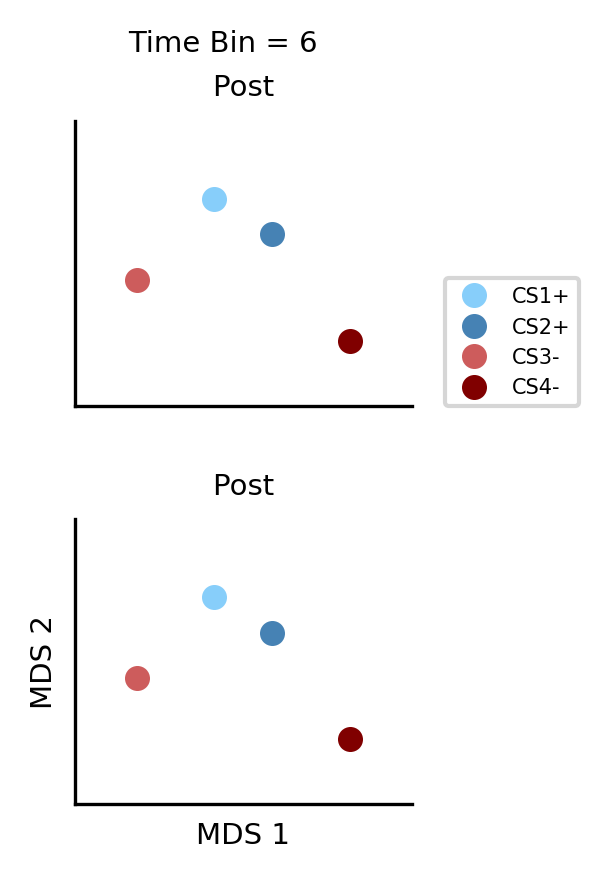

In [41]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 2
t = 6

#plot_mds(axs[0], np.mean(eval("patterns_tb_%s_pre_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[0], eval("patterns_tb_%s_post_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[0].set_title('Post')
#plot_mds(axs[1], np.mean(eval("patterns_tb_%s_post_all_mds"%t),axis=0), labels_comb, symbol1='o',symbol2='o')
plot_mds(axs[1], eval("patterns_tb_%s_post_all_mds[which_run]"%t), labels_comb, symbol1='o',symbol2='o')
axs[1].set_title('Post')

axs[0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)
lim = 20
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def plot_mds_3d(ax, postrenew_patterns_all_mds, labels_comb, with_background=False,
             symbol1='o', symbol2='^', colors=['lightskyblue','steelblue','indianred','maroon']):

    x = postrenew_patterns_all_mds[:, 0]
    y = postrenew_patterns_all_mds[:, 1]
    z = postrenew_patterns_all_mds[:, 2]

    #n_pre = postrenew_patterns_all_mds.shape[0]/2
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    CS1z = [z[labels_comb==1].mean()]
    CS2z = [z[labels_comb==2].mean()]
    CS3z = [z[labels_comb==3].mean()]
    CS4z = [z[labels_comb==4].mean()]

    ax.plot(CS1x, CS1y, CS1z, symbol1, mew=1, ms=5, zorder=19, color = colors[0])
    ax.plot(CS2x, CS2y, CS2z, symbol1, mew=1, ms=5, zorder=19, color = colors[1])
    ax.plot(CS3x, CS3y, CS3z, symbol2, mew=1, ms=5, zorder=19, color = colors[2])
    ax.plot(CS4x, CS4y, CS4z, symbol2, mew=1, ms=5, zorder=19, color = colors[3])

    if with_background:
        ax.plot(x[labels_comb==1], y[labels_comb==1], z[labels_comb==1],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[0])
        ax.plot(x[labels_comb==2], y[labels_comb==2], z[labels_comb==2],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[1])
        ax.plot(x[labels_comb==3], y[labels_comb==3], z[labels_comb==3],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[2])
        ax.plot(x[labels_comb==4], y[labels_comb==4], z[labels_comb==4],
                symbol1, mew=0, ms=2, alpha=0.3, color=colors[3])
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    #ax.set_zlim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_zticks(())

In [ ]:
#fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 6
lim = 10

fig = pl.figure(figsize=(4, 2))

for i in range(1):       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    ax.view_init(azim=10, elev=20)

    plot_mds_3d(ax, eval("patterns_tb_%s_%s_all_mds_3d[which_run]"%(t,sessions[i])), labels_comb, symbol1='o',symbol2='o',
                with_background=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Time Bin = "+str(t),fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [12]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.4,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=6)
    return sig_value, p

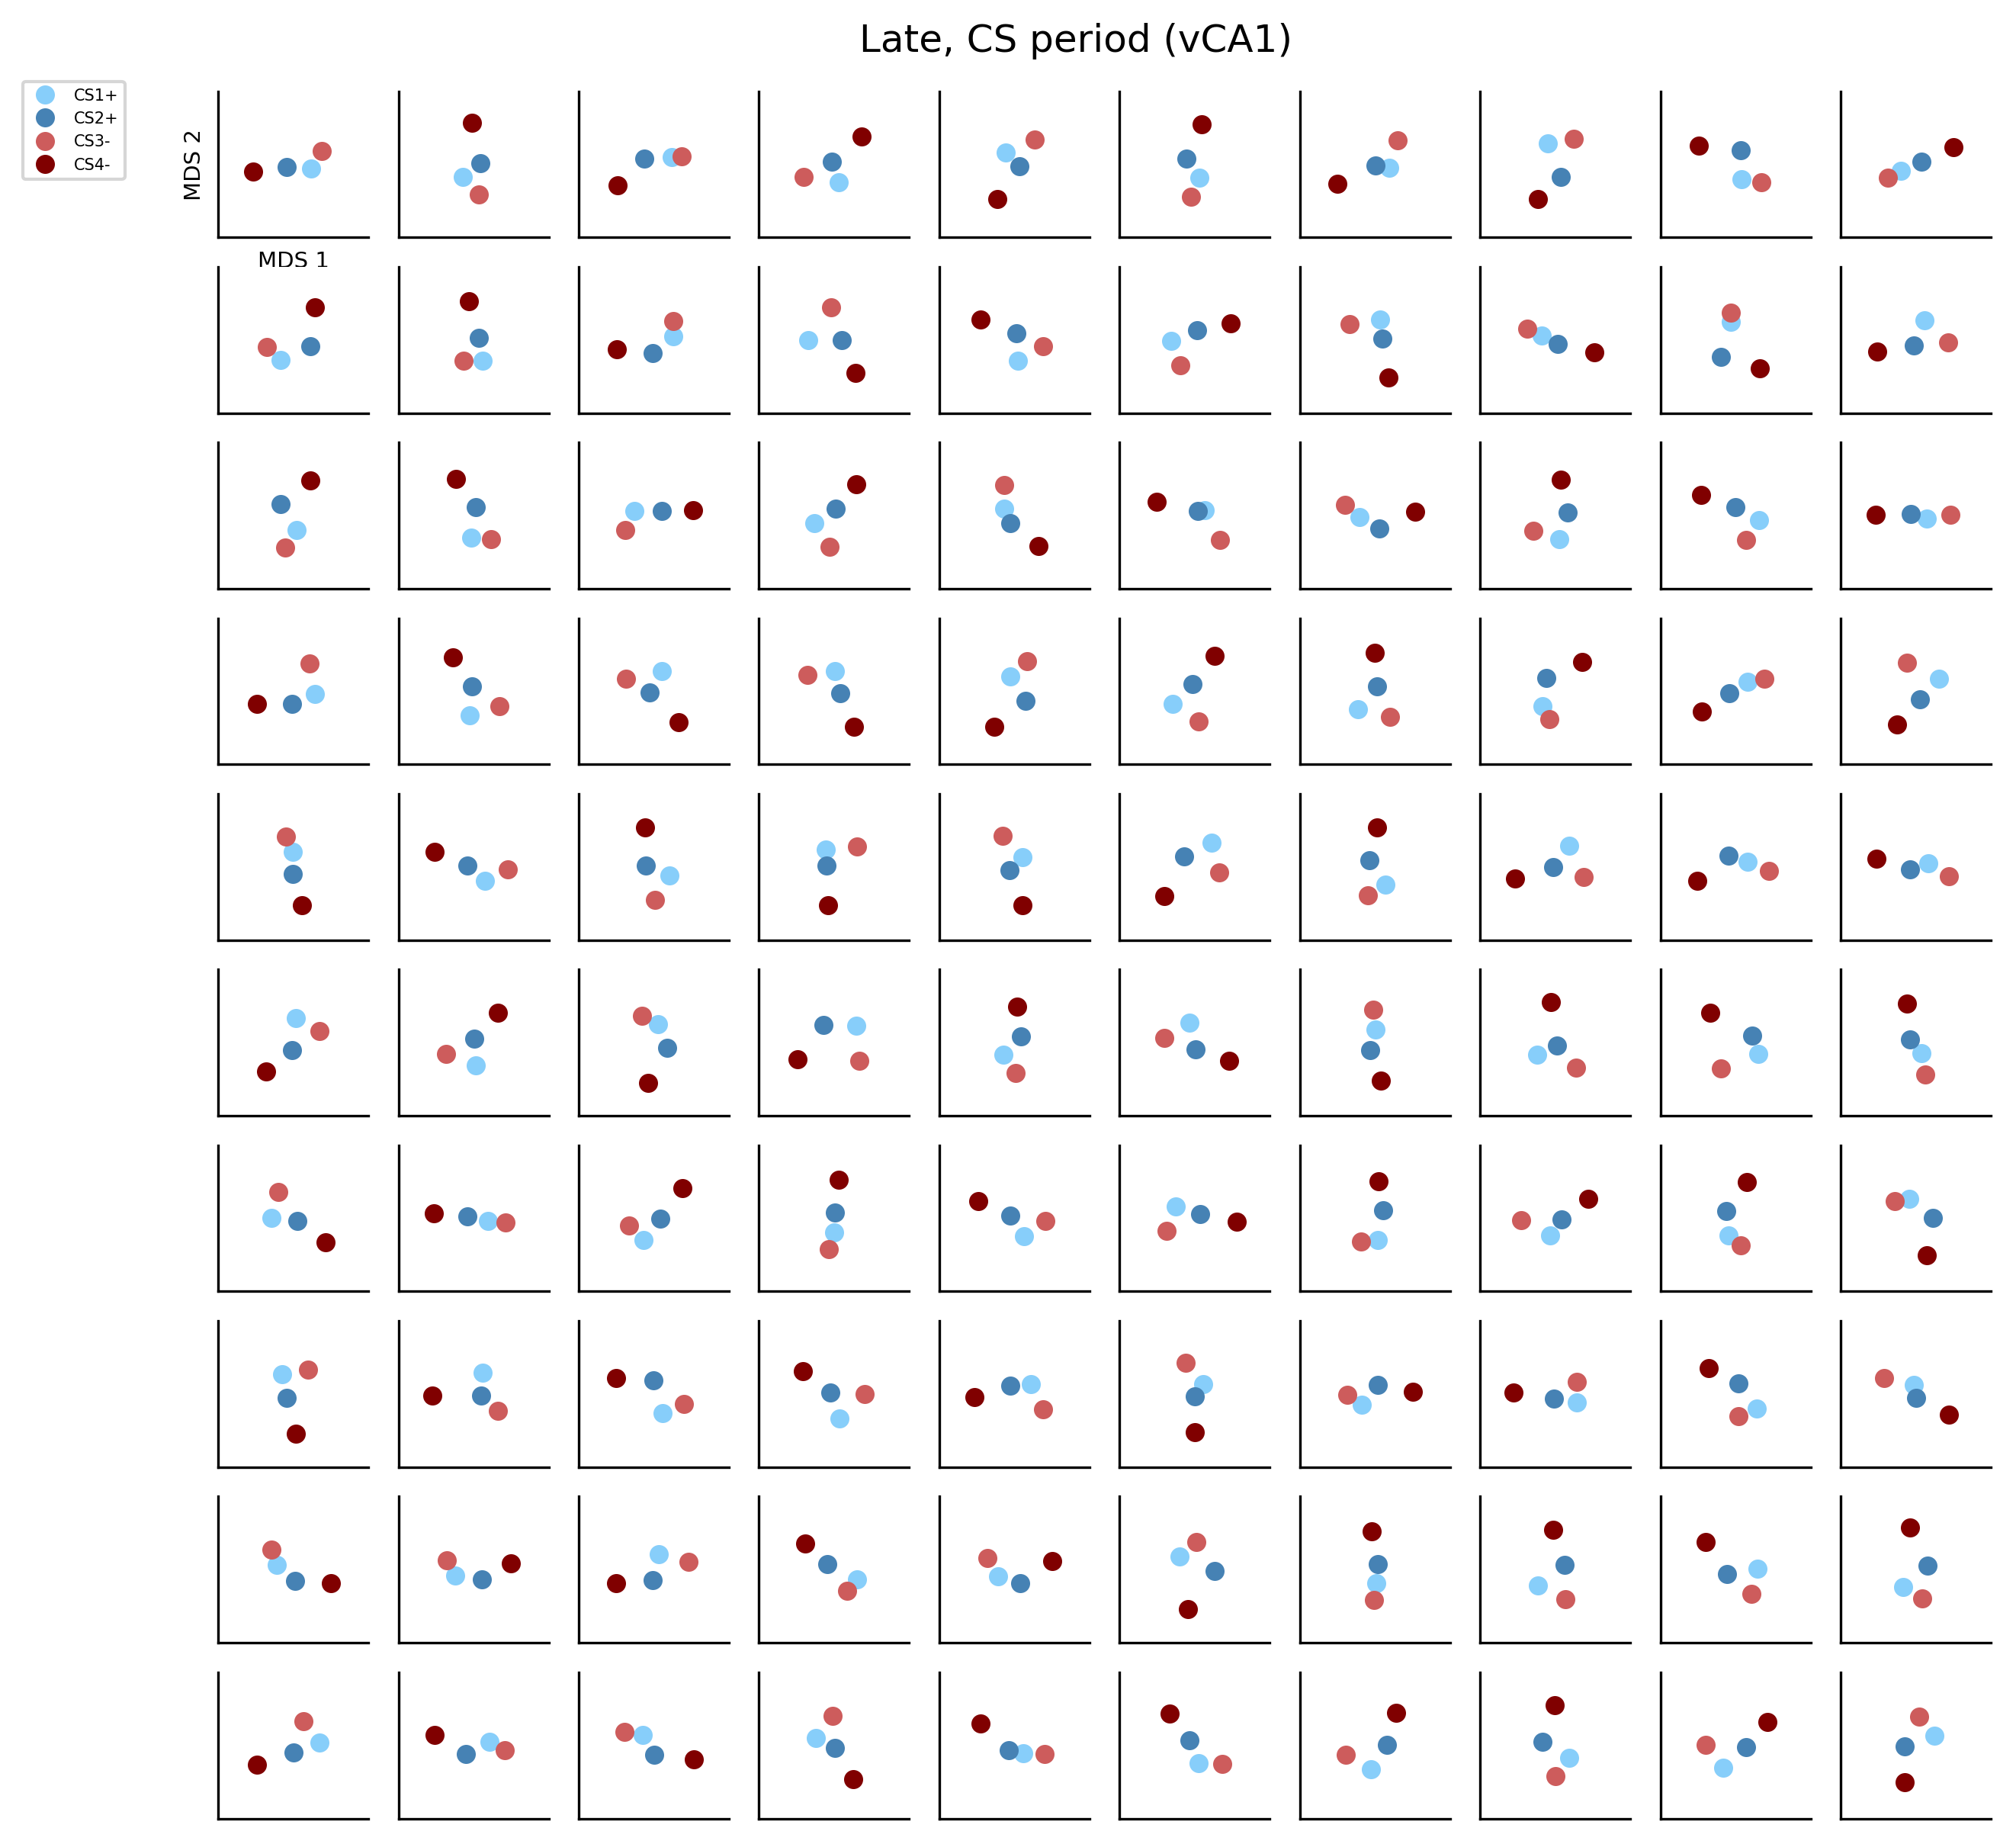

In [54]:
fig, axs = pl.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)

for r in range(10):
    plot_mds(axs[0][r], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(10,20),range(10)):
    plot_mds(axs[1][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(20,30),range(10)):
    plot_mds(axs[2][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')    
for r,c in zip(range(30,40),range(10)):
    plot_mds(axs[3][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')   
for r,c in zip(range(40,50),range(10)):
    plot_mds(axs[4][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(50,60),range(10)):
    plot_mds(axs[5][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(60,70),range(10)):
    plot_mds(axs[6][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(70,80),range(10)):
    plot_mds(axs[7][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o') 
for r,c in zip(range(80,90),range(10)):
    plot_mds(axs[8][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
for r,c in zip(range(90,100),range(10)):
    plot_mds(axs[9][c], patterns_tb_6_post_all_mds[r], labels_comb, symbol1='o',symbol2='o')
    
axs[0][0].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(-1.3, 0.4))

lim = 30
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

axs[0][0].set_xlabel('MDS 1')
axs[0][0].set_ylabel('MDS 2')
pl.suptitle("Late, CS period (vCA1)",y=.91,fontsize=12)


fig.savefig('../img/%s_mds_all_runs_CS.jpg'%NOTEBOOK_NAME, bbox='tight')

NameError: name 'patterns_tb_6_post_all_mds_3d_mean' is not defined

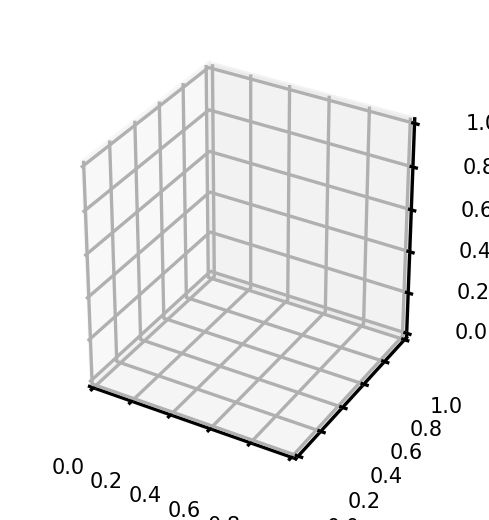

In [56]:
#fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)
which_run = 0
t = 6
lim = 2

fig = pl.figure(figsize=(4, 2))

for i in range(1):
       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    #ax.view_init(azim=10, elev=20)

    plot_mds_3d(ax, eval("patterns_tb_%s_%s_all_mds_3d_mean"%(t,sessions[i])), labels_comb, symbol1='o',symbol2='o',
                with_background=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs, Time Bin = "+str(t),fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

## find euclidian distances between data points

In [10]:
from scipy.spatial import distance

def get_euclid_dist(prepost_patterns_all_mds, labels_comb):

    x = prepost_patterns_all_mds[:, 0]
    y = prepost_patterns_all_mds[:, 1]
    
    CS1x = [x[labels_comb==1].mean()]
    CS2x = [x[labels_comb==2].mean()]
    CS3x = [x[labels_comb==3].mean()]
    CS4x = [x[labels_comb==4].mean()]
    CS1y = [y[labels_comb==1].mean()]
    CS2y = [y[labels_comb==2].mean()]
    CS3y = [y[labels_comb==3].mean()]
    CS4y = [y[labels_comb==4].mean()]
    
    CS1 = (CS1x,CS1y)
    CS2 = (CS2x,CS2y) 
    CS3 = (CS3x,CS3y) 
    CS4 = (CS4x,CS4y)
    
    dist_CS1_CS2 = distance.euclidean(CS1,CS2)
    dist_CS1_CS3 = distance.euclidean(CS1,CS3)
    dist_CS1_CS4 = distance.euclidean(CS1,CS4)
    dist_CS2_CS3 = distance.euclidean(CS2,CS3)
    dist_CS2_CS4 = distance.euclidean(CS2,CS4)
    dist_CS3_CS4 = distance.euclidean(CS3,CS4)
    
    return dist_CS1_CS2, dist_CS1_CS3, dist_CS1_CS4, dist_CS2_CS3, dist_CS2_CS4, dist_CS3_CS4

In [ ]:
for sess in sessions:
    for t in range(14):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_tb_%s_%s = {}"%(sess,t,comp[0]+comp[1]))
        for w in range(len(eval("patterns_tb_%s_%s_all_mds"%(t,sess)))):
                exec("d_%s_tb_%s_CS1CS2[w], d_%s_tb_%s_CS1CS3[w], d_%s_tb_%s_CS1CS4[w], d_%s_tb_%s_CS2CS3[w], d_%s_tb_%s_CS2CS4[w], d_%s_tb_%s_CS3CS4[w] = \
                get_euclid_dist(patterns_tb_%s_%s_all_mds[w], labels_comb)"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t,t,sess))

In [ ]:
for sess in sessions:
    for t in range(14):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_tb_%s_%s_app = []"%(sess,t,comp[0]+comp[1]))
            for w in range(len(eval("patterns_tb_%s_%s_all_mds"%(t,sess)))):
                exec("d_%s_tb_%s_%s_app.append(d_%s_tb_%s_%s[w])"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
            exec("d_%s_tb_%s_CSpvsCSm_app = []"%(sess,t))
            for w in range(len(eval("patterns_tb_%s_%s_all_mds"%(t,sess)))):
                exec("d_%s_tb_%s_CSpvsCSm_app.append(np.mean([d_%s_tb_%s_CS1CS3[w], d_%s_tb_%s_CS1CS4[w], d_%s_tb_%s_CS2CS3[w], \
                      d_%s_tb_%s_CS2CS4[w]]))"%(sess,t,sess,t,sess,t,sess,t,sess,t))

In [966]:
##get mean of loops
#for sess in sessions:
#    for t in range(5,13):
#        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
#            exec("d_%s_tb_%s_%s_mean = []"%(sess,t,comp[0]+comp[1]))
#            q=0
#            for x in range(n_loop):
#                q = eval("d_%s_tb_%s_%s[x]"%(sess,t,comp[0]+comp[1]))+q
#            exec("d_%s_tb_%s_%s_mean = q/n_loop"%(sess,t,comp[0]+comp[1]))
#        exec("d_%s_tb_%s_CSpvsCSm_mean = (d_%s_tb_%s_CS1CS3_mean + d_%s_tb_%s_CS1CS4_mean + d_%s_tb_%s_CS2CS3_mean + \
#              d_%s_tb_%s_CS2CS4_mean)/4"%(sess,t,sess,t,sess,t,sess,t,sess,t))

In [57]:
#get mean of loops
for sess in sessions:
    for t in range(14):
        for comp in (['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']):
            exec("d_%s_tb_%s_%s_mean = np.mean([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
            exec("d_%s_tb_%s_%s_std = np.std([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])"%(sess,t,comp[0]+comp[1],
                                                                    sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1]))
        exec("d_%s_tb_%s_CSpvsCSm_mean = np.mean([[d_%s_tb_%s_CS1CS3[x], d_%s_tb_%s_CS1CS4[x], d_%s_tb_%s_CS2CS3[x], \
              d_%s_tb_%s_CS2CS4[x]] for x in d_%s_tb_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))
        exec("d_%s_tb_%s_CSpvsCSm_std = np.std([[d_%s_tb_%s_CS1CS3[x], d_%s_tb_%s_CS1CS4[x], d_%s_tb_%s_CS2CS3[x], \
              d_%s_tb_%s_CS2CS4[x]] for x in d_%s_tb_%s_CS1CS3])"%(sess,t,sess,t,sess,t,sess,t,sess,t,sess,t))

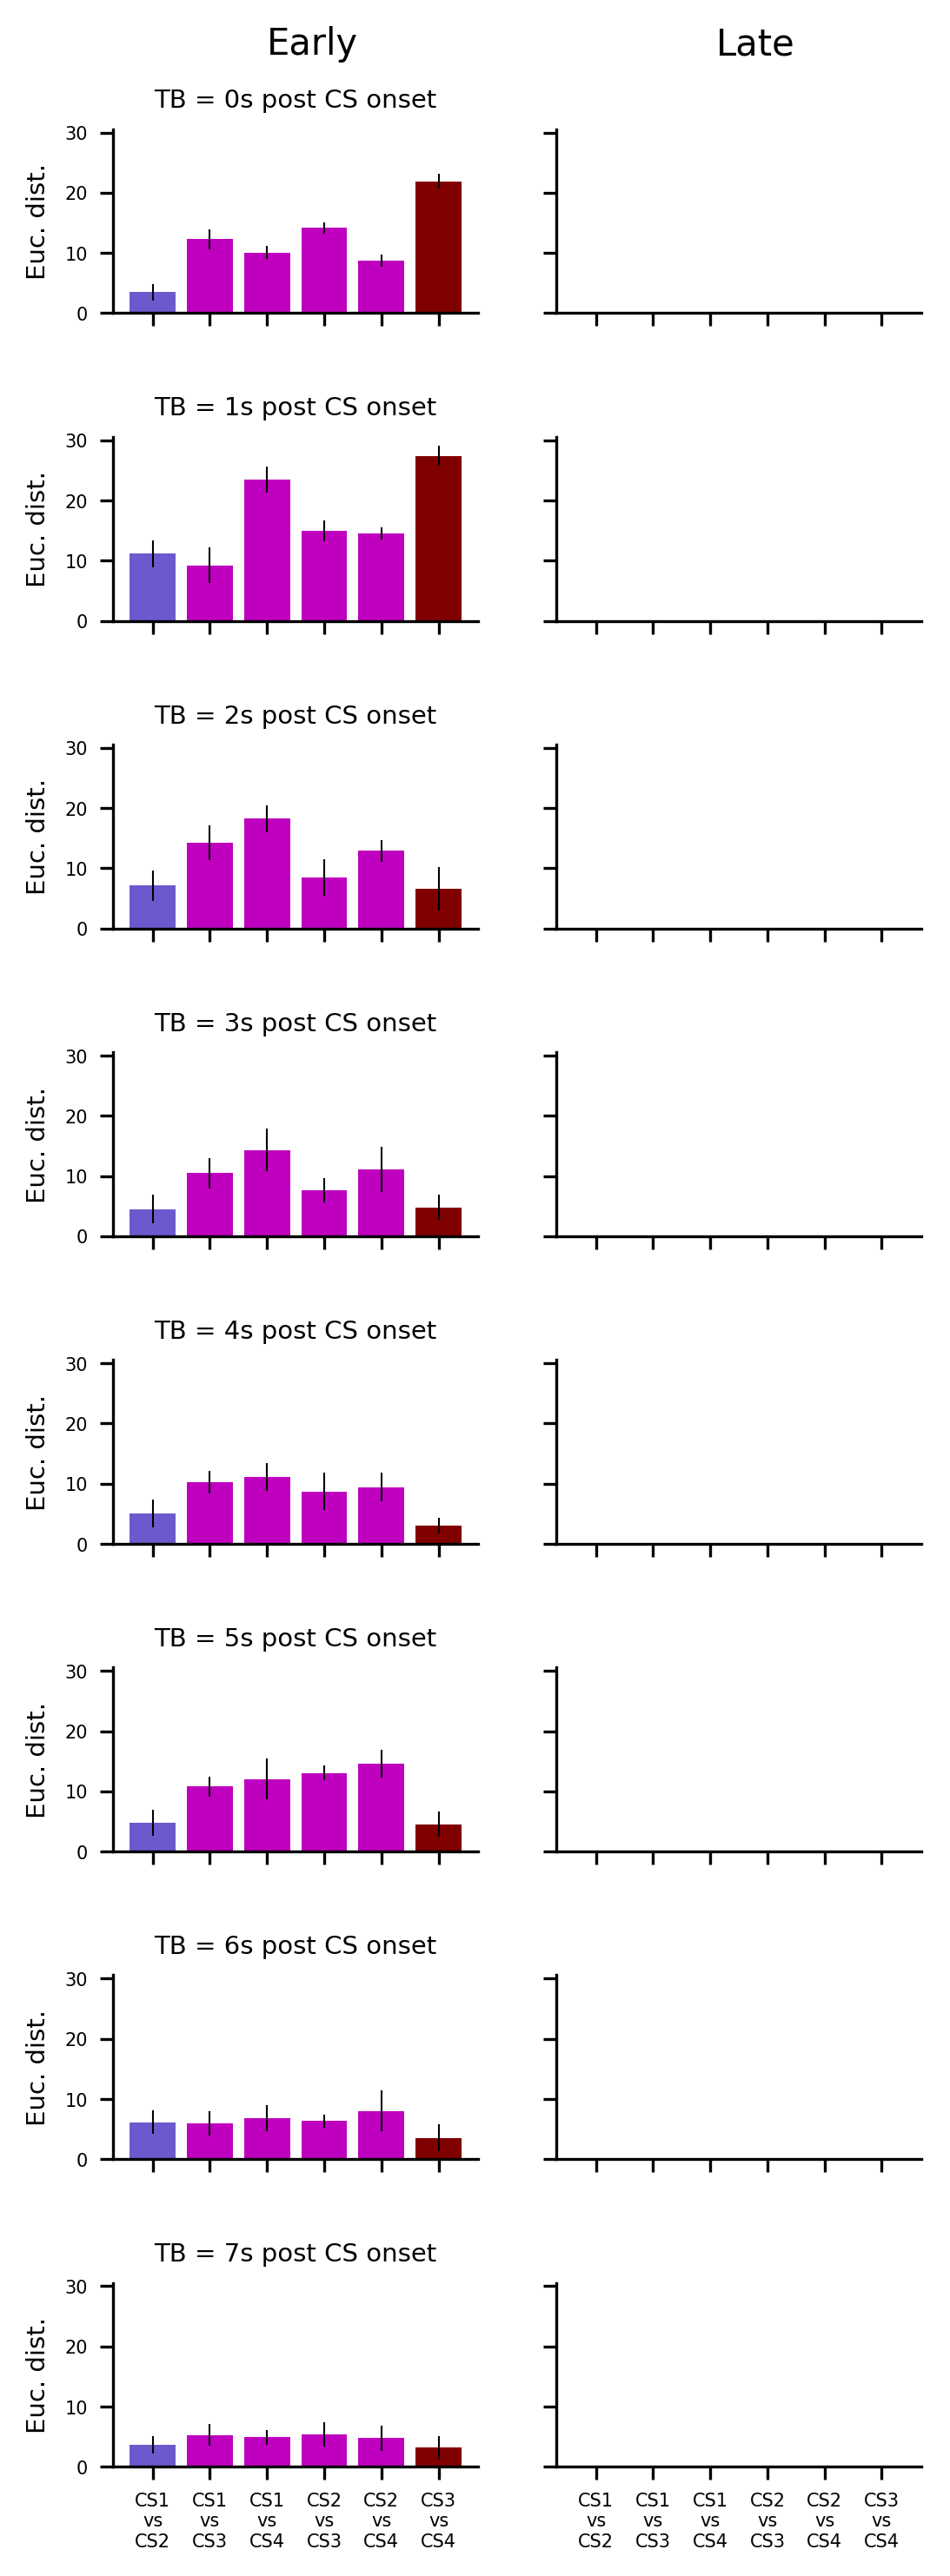

In [49]:
fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

In [ ]:
fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','m','m','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CS1','CS3'],['CS1','CS4'], ['CS2','CS3'], ['CS2','CS4'], ['CS3','CS4']),range(6)):
            ax[c][r].bar(f,eval("[np.mean([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         yerr=eval("[np.std([d_%s_tb_%s_%s[x] for x in d_%s_tb_%s_%s])]"%(sess,t,comp[0]+comp[1],sess,t,comp[0]+comp[1])),
                         color=colors[f])
            

            ax[c][r].set_xticks(range(6))
            ax[c][r].set_xticklabels(['CS1\nvs\nCS2', 'CS1\nvs\nCS3','CS1\nvs\nCS4', 'CS2\nvs\nCS3', 'CS2\nvs\nCS4', 'CS3\nvs\nCS4'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

In [ ]:
fig,ax = pl.subplots(len(range(5,13)),2,figsize=(4,10),sharex=True,sharey=True)
colors='slateblue','m','maroon'

for sess,r in zip(sessions,[0,1]):
    for t,c in zip(range(5,13),range(len(range(5,13)))):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

            ax[c][r].set_xticks(range(3))
            ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            ax[c][r].set_ylabel('Euc. dist.')
            ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)
ax[0][0].text(2,43,'Early',fontsize=10)
ax[0][1].text(2.1,43,'Late',fontsize=10)
        

In [ ]:
colors='cyan','m','k'
listy='-','-','--'
tb=range(14)

fig,ax = pl.subplots(2,1,figsize=(3,3),sharex=True,sharey=True)

for sess,r in zip(sessions,[0,1]):
    for comp,f,comp_la in zip((['CS1','CS2'], ['CS3','CS4'],['CSpvs','CSm']),range(3),('CS+ vs CS+','CS-  vs CS-','CS+ vs CS-')):
        ax[r].plot([(t) for t in tb],[eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb],color=colors[f],
                   linestyle=listy[f], label=comp_la)
        m = np.array([eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])) for t in tb])
        s = np.array([eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])) for t in tb])
        ax[r].fill_between([(t) for t in tb],m-s,m+s,alpha=0.2,color=colors[f],linewidth=0)

ax[1].legend(fontsize=4.5)
ax[0].set_title('Early',fontsize=8)
ax[1].set_title('Late',fontsize=8)
ax[0].set_ylabel('Euc. dist')
ax[1].set_ylabel('Euc. dist')
#ax[0].set_xlabel('Time from CS onset')
ax[1].set_xlabel('Time from CS onset')
tick_labels = range(-4,10)
ticks = range(0,len(tb))
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_labels)
    #for t,c in zip(range(5,13),range(len(range(5,13)))):
    #    for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
    #        ax[c][r].bar(f,eval("d_%s_tb_%s_%s_mean"%(sess,t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_%s_tb_%s_%s_std"%(sess,t,comp[0]+comp[1])))
            

    #        ax[c][r].set_xticks(range(3))
    #        ax[c][r].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
    #        ax[c][r].set_ylabel('Euc. dist.')
    #        ax[c][r].set_title('TB = '+str(t-5)+'s post CS onset')
fig.tight_layout(pad=4)

In [11]:
def plot_mds_trajectory(ax, labels_comb, session='post', tb = range(5,13), al = range(8), which_run=0, symbol1='o', symbol2='^',
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_mean[:, 1]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
    alpha_levels = np.linspace(.3,.9,len(tb))
    #Pl1y = (CS1y[tb[0]],CS1y[tb[1]],CS1y[tb[2]],CS1y[tb[3]])
    #Pl1x = (CS1x[tb[0]],CS1x[tb[1]],CS1x[tb[2]],CS1x[tb[3]])
    #Pl1c = ([0,1,1,.2],[0,1,1,.4],[0,1,1,.6],[0,1,1,.8])
    #colors = cmap(np.linspace(0.1, 0.9, all_traces.shape[1]))
    #ax.scatter(x-xyinit[0], y-xyinit[1], s=2, linewidths=0, edgecolors=colors, c=colors, zorder=19)
    if CSp == True:
        ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], color = colors[0], zorder=1, alpha=.3, label='CS1+')
        ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], color = colors[1], zorder=1, alpha=.3, label='CS2+')
        #ax.plot(Pl1x,Pl1y,color = 'k')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS1x[t], CS1y[t], symbol1, mew=0, ms=2, color = colors[0], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS2x[t], CS2y[t], symbol1, mew=0, ms=2, color = colors[1], alpha=alpha_levels[z], zorder=2)
    if CSm == True:
        ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb],  linestyle='--', color = colors[2], zorder=1, alpha=.3, label='CS3-')
        ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb],  linestyle='--', color = colors[3], zorder=1, alpha=.3, label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = [6,8,10,12], which_run=1, symbol1='o',symbol2='^')
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = [6,8,10,12], which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(5,13), which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(5,13), which_run=1, symbol1='o',symbol2='^',CSm=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
fig, axs = pl.subplots(2, 1, figsize=(1.7, 3), sharex=True, sharey=True)

plot_mds_trajectory(axs[0], labels_comb, session='pre', tb = range(5,11), which_run=1, symbol1='o',symbol2='o',CSp=False)
axs[0].set_title('Early')
plot_mds_trajectory(axs[1], labels_comb, session='post', tb = range(5,11), which_run=1, symbol1='o',symbol2='o',CSp=False)
axs[1].set_title('Late')

axs[0].legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of all runs",fontsize=7)
lim = 2
for ax in axs.flatten():
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')

fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce

def plot_mds_trajectory_3d(ax, labels_comb, session='post', tb = range(5,13), symbol1='o', symbol2='^',cmap=pl.cm.gray_r,
                        CSp=True, CSm=True, colors=['firebrick','steelblue','firebrick','steelblue']):
    x={}
    y={}
    z={}
    CS1x = {}
    CS2x = {}
    CS3x = {}
    CS4x = {}
    CS1y = {}
    CS2y = {}
    CS3y = {}
    CS4y = {}
    CS1z = {}
    CS2z = {}
    CS3z = {}
    CS4z = {}
    for t in tb:
        x[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 0]"%(t,session))
        y[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 1]"%(t,session))
        z[t] = eval("patterns_tb_%s_%s_all_mds_3d_mean[:, 2]"%(t,session))
        CS1x[t] = [x[t][labels_comb==1].mean()]
        CS2x[t] = [x[t][labels_comb==2].mean()]
        CS3x[t] = [x[t][labels_comb==3].mean()]
        CS4x[t] = [x[t][labels_comb==4].mean()]
        CS1y[t] = [y[t][labels_comb==1].mean()]
        CS2y[t] = [y[t][labels_comb==2].mean()]
        CS3y[t] = [y[t][labels_comb==3].mean()]
        CS4y[t] = [y[t][labels_comb==4].mean()]
        CS1z[t] = [z[t][labels_comb==1].mean()]
        CS2z[t] = [z[t][labels_comb==2].mean()]
        CS3z[t] = [z[t][labels_comb==3].mean()]
        CS4z[t] = [z[t][labels_comb==4].mean()]
    
    Pl1x=[]
    Pl1y=[]
    Pl1z=[]
    Pl2x=[]
    Pl2y=[]
    Pl2z=[]
    Pl3x=[]
    Pl3y=[]
    Pl3z=[]
    Pl4x=[]
    Pl4y=[]
    Pl4z=[]
    for t in tb:
        Pl1x.append(CS1x[t])
        Pl1y.append(CS1y[t])
        Pl1z.append(CS1z[t])
        Pl2x.append(CS2x[t])
        Pl2y.append(CS2y[t])
        Pl2z.append(CS2z[t])
        Pl3x.append(CS3x[t])
        Pl3y.append(CS3y[t])
        Pl3z.append(CS3z[t])
        Pl4x.append(CS4x[t])
        Pl4y.append(CS4y[t])
        Pl4z.append(CS4z[t])
    Pl1x = reduce(lambda x,y: x+y,Pl1x)
    Pl1y = reduce(lambda x,y: x+y,Pl1y)
    Pl1z = reduce(lambda x,y: x+y,Pl1z)
    Pl2x = reduce(lambda x,y: x+y,Pl2x)
    Pl2y = reduce(lambda x,y: x+y,Pl2y)
    Pl2z = reduce(lambda x,y: x+y,Pl2z)
    Pl3x = reduce(lambda x,y: x+y,Pl3x)
    Pl3y = reduce(lambda x,y: x+y,Pl3y)
    Pl3z = reduce(lambda x,y: x+y,Pl3z)
    Pl4x = reduce(lambda x,y: x+y,Pl4x)
    Pl4y = reduce(lambda x,y: x+y,Pl4y)
    Pl4z = reduce(lambda x,y: x+y,Pl4z)
    
    alpha_levels = np.linspace(.2,.9,len(tb))
    if CSp == True:
        #ax.plot([CS1x[t] for t in tb], [CS1y[t] for t in tb], [CS1z[t] for t in tb], '-', color = colors[0], zorder=1,alpha=.4)
        #ax.plot([CS2x[t] for t in tb], [CS2y[t] for t in tb], [CS2z[t] for t in tb], '-', color = colors[1], zorder=1,alpha=.4)
        ax.plot(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0],color = 'blue', alpha=.2, label='CS1+')
        ax.plot(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0],color = 'red',  alpha=.2, label='CS2+')
        #for t,z in zip(tb,range(len(tb))):
        cmap = pl.cm.Blues
        colorz = cmap(np.linspace(0.2, 0.9,len(tb)))
        ax.scatter(Pl1x-Pl1x[0],Pl1y-Pl1y[0],Pl1z-Pl1z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl1x[-1]-Pl1x[0]],[Pl1y[-1]-Pl1y[0]],[Pl1z[-1]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='blue', ms=5, lw=0.5)
        
        cmap = pl.cm.Reds
        colorz = cmap(np.linspace(0.1, 0.9,len(tb)))
        ax.scatter(Pl2x-Pl2x[0],Pl2y-Pl2y[0],Pl2z-Pl2z[0], symbol1, s=2, color = colorz, zorder=2)
        ax.plot([Pl2x[-1]-Pl2x[0]],[Pl2y[-1]-Pl2y[0]],[Pl2z[-1]-Pl2z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='red', ms=5, lw=0.5)      
        
        ax.plot([Pl1x[0]-Pl1x[0]],[Pl1y[0]-Pl1y[0]],[Pl1z[0]-Pl1z[0]],
            'o', mew=1, mfc=(0, 0, 0, 0,), mec='k', ms=5, lw=0.5)
    if CSm == True:
        #ax.plot([CS3x[t] for t in tb], [CS3y[t] for t in tb], [CS3z[t] for t in tb], '--', color = colors[2], zorder=1,alpha=.4)
        #ax.plot([CS4x[t] for t in tb], [CS4y[t] for t in tb], [CS4z[t] for t in tb], '--', color = colors[3], zorder=1,alpha=.4)
        ax.plot(Pl3x,Pl3y,Pl3z,color = colors[2], alpha=.3,linestyle='--', label='CS3-')
        ax.plot(Pl4x,Pl4y,Pl4z,color = colors[3], alpha=.3,linestyle='--', label='CS4-')
        for t,z in zip(tb,range(len(tb))):
            ax.plot(CS3x[t], CS3y[t], CS3z[t], symbol2, mew=0, ms=2, color = colors[2], alpha=alpha_levels[z], zorder=2)
            ax.plot(CS4x[t], CS4y[t], CS4z[t], symbol2, mew=0, ms=2, color = colors[3], alpha=alpha_levels[z], zorder=2)
                    
    lim = 4
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())

In [ ]:
lim=1

fig = pl.figure(figsize=(4, 2))

for i in range(2):
       
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    #ax.view_init(azim=10, elev=20)

    plot_mds_trajectory_3d(ax, labels_comb, session=sessions[i], tb=range(4,11), symbol1='o',symbol2='o',CSm=False)
    ax.set_title(sessions[i])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

ax.legend(fontsize=5, loc=(1.1, 0))

pl.suptitle("vHPC, mean of all runs",fontsize=7)

ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_zlabel('MDS 3')


fig.tight_layout(pad=3)

#fig.savefig('../img/%s__mds_all4_tr.pdf'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
fig, axs = pl.subplots(2, 5, figsize=(6, 2.7), sharex=False, sharey=False)
colors=['dodgerblue','darkorchid','firebrick']

for t,q,ti in zip([3,6,8,10,12],range(5),['Baseline','CS','Tr','US','Late US']):
    plot_mds(axs[0][q], eval("patterns_tb_%s_pre_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 1.3
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    
for t,c,ti in zip([3,6,8,10,12],range(len(range(5))),['Base','CS','Tr','US','Late US']):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            axs[1][c].bar(f,eval("d_pre_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[1][c].set_xticks(range(3))
            axs[1][c].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            axs[1][c].tick_params(axis='x',length=.5,bottom=False)
            axs[1][c].set_ylabel('Euc. dist.')
            axs[1][c].set_title(ti)
            axs[1][c].set_ylim(0,40)
pvs=[]
loops=15
comp = ['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']
for t,c in zip([3,6,8,10,12],range(len(range(5)))):
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35))
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,40))
    pvs.append(add_significance(axs[1][c], eval("d_pre_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_pre_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35))

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Early, Mean of runs, 1s bins",fontsize=9)




fig.tight_layout(pad=3)

fig.savefig('../img/%s_composite_Early.pdf'%NOTEBOOK_NAME, bbox='tight')

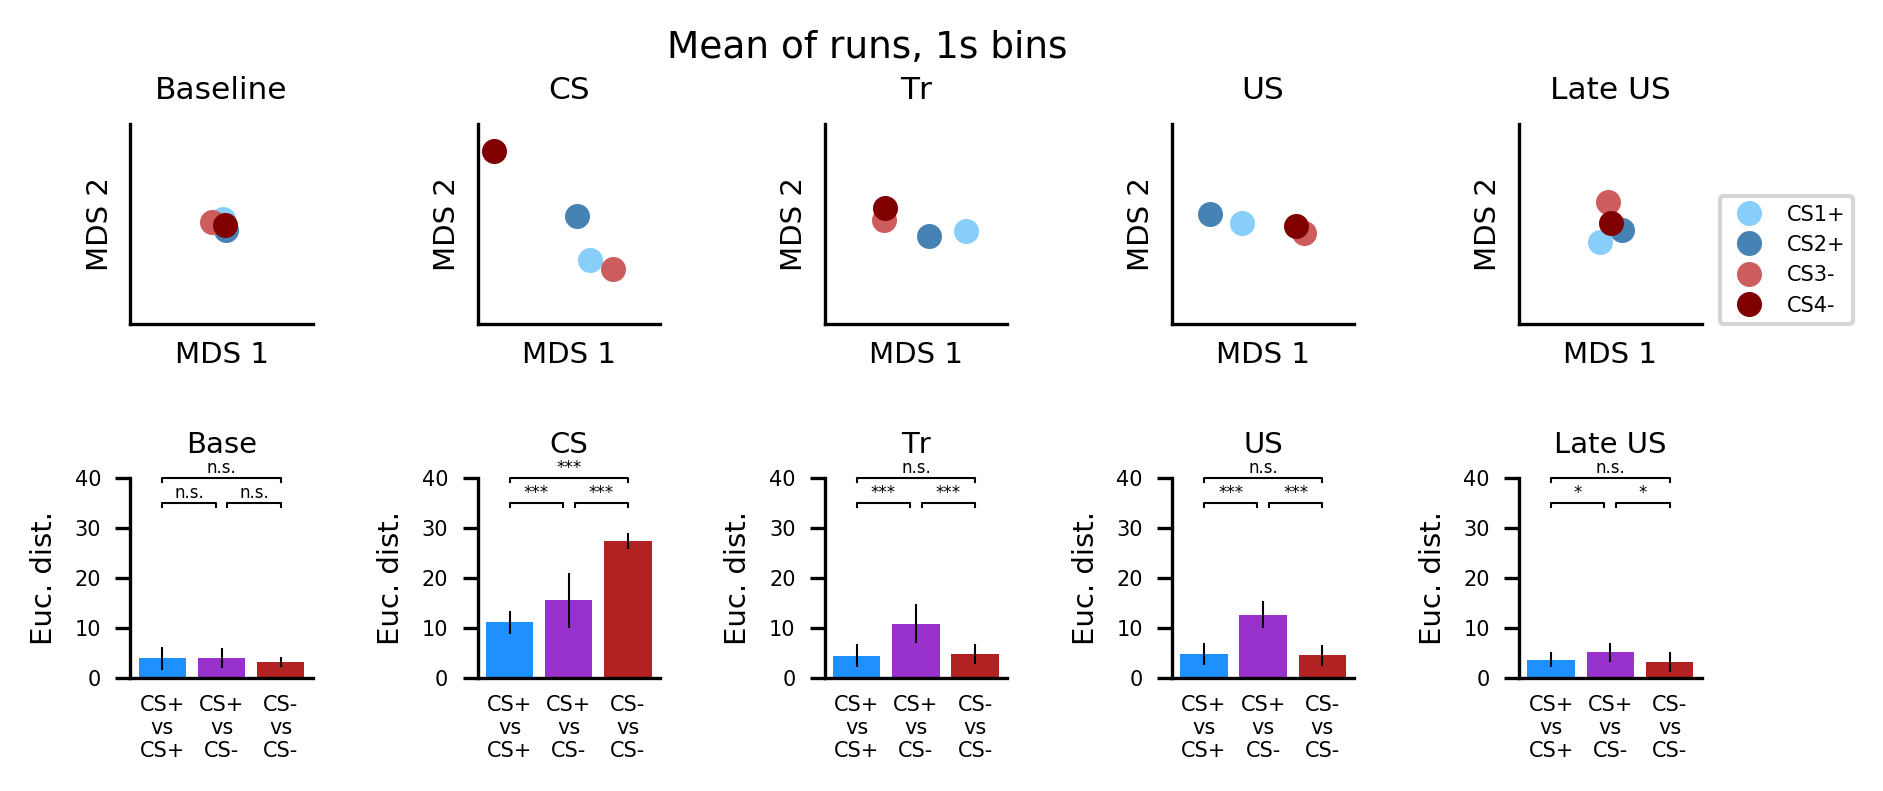

In [59]:
fig, axs = pl.subplots(2, 5, figsize=(6, 2.7), sharex=False, sharey=False)
colors=['dodgerblue','darkorchid','firebrick']

for t,q,ti in zip([3,6,8,10,12],range(5),['Baseline','CS','Tr','US','Late US']):
    plot_mds(axs[0][q], eval("patterns_tb_%s_post_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 2
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    
for t,c,ti in zip([3,6,8,10,12],range(len(range(5))),['Base','CS','Tr','US','Late US']):
        for comp,f in zip((['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']),range(3)):
            axs[1][c].bar(f,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[1][c].set_xticks(range(3))
            axs[1][c].set_xticklabels(['CS+\nvs\nCS+', 'CS+\nvs\nCS-', 'CS-\nvs\nCS-'])
            axs[1][c].tick_params(axis='x',length=.5,bottom=False)
            axs[1][c].set_ylabel('Euc. dist.')
            axs[1][c].set_title(ti)
            axs[1][c].set_ylim(0,40)
pvs=[]
loops=10
comp = ['CS1','CS2'], ['CSpvs','CSm'], ['CS3','CS4']
for t,c in zip([3,6,8,10,12],range(len(range(5)))):
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,40))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35))

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("Mean of runs, 1s bins",fontsize=9)




fig.tight_layout(pad=3)

fig.savefig('../img/%s_composite_Late.pdf'%NOTEBOOK_NAME, bbox='tight')

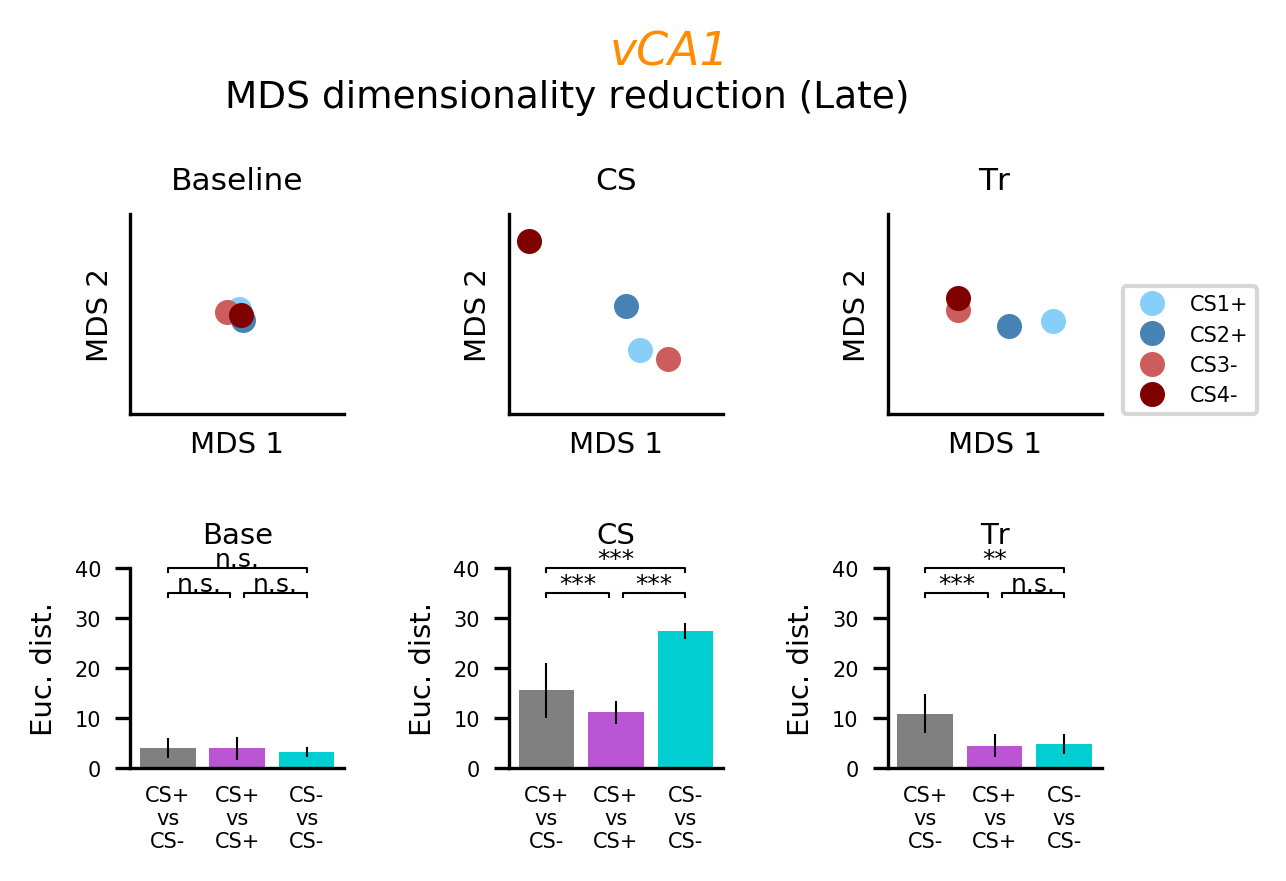

In [16]:
fig, axs = pl.subplots(2, 3, figsize=(4, 2.7), sharex=False, sharey=False)
colors=['gray','mediumorchid','darkturquoise']

for t,q,ti in zip([3,6,8],range(3),['Baseline','CS','Tr']):
    plot_mds(axs[0][q], eval("patterns_tb_%s_post_all_mds_mean"%t), labels_comb, symbol1='o',symbol2='o')
    axs[0][q].set_xlabel('MDS 1')
    axs[0][q].set_ylabel('MDS 2')
    axs[0][q].set_title(ti, fontsize=7.5)
    lim = 2
    axs[0][q].set_xlim(-lim, lim)
    axs[0][q].set_ylim(-lim, lim)
    
    
for t,c,ti in zip([3,6,8],range(len(range(3))),['Base','CS','Tr']):
        for comp,f in zip((['CSpvs','CSm'],['CS1','CS2'], ['CS3','CS4']),range(3)):
            axs[1][c].bar(f,eval("d_post_tb_%s_%s_mean"%(t,comp[0]+comp[1])),color=colors[f],yerr=eval("d_post_tb_%s_%s_std"%(t,comp[0]+comp[1])))
            
            axs[1][c].set_xticks(range(3))
            axs[1][c].set_xticklabels(['CS+\nvs\nCS-', 'CS+\nvs\nCS+', 'CS-\nvs\nCS-'])
            axs[1][c].tick_params(axis='x',length=.5,bottom=False)
            axs[1][c].set_ylabel('Euc. dist.')
            axs[1][c].set_title(ti)
            axs[1][c].set_ylim(0,40)
pvs=[]
loops=10
comp = ['CSpvs','CSm'], ['CS1','CS2'], ['CS3','CS4']
for t,c in zip([3,6,8],range(len(range(3)))):
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],0,.9,35,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[0][0]+comp[0][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],0,2,40,mcc=2))
    pvs.append(add_significance(axs[1][c], eval("d_post_tb_%s_%s_app"%(t,comp[1][0]+comp[1][1]))[:loops],
                eval("d_post_tb_%s_%s_app"%(t,comp[2][0]+comp[2][1]))[:loops],1.1,2,35,mcc=2))

axs[0][q].legend(['CS1+', 'CS2+', 'CS3-', 'CS4-'],
                 fontsize=5, loc=(1.1, 0))

pl.suptitle("MDS dimensionality reduction (Late)",fontsize=9,y=1.03)
axs[0][1].text(1,5,'vCA1',color='darkorange',fontsize=11,fontstyle='italic',ha='center')




fig.tight_layout(pad=3)

fig.savefig('../figures/%s_composite_Late_3.pdf'%NOTEBOOK_NAME, bbox='tight')

In [ ]:
dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm = get_euclid_dist(prepost_patterns_all_mds[10], labels_comb[10])

In [ ]:
for x,y in zip(range(6),(dist_prepost_CSm, dist_prepost_CSp,dist_prepost_CSpCSm, dist_prepost_CSmCSp, dist_prepre_CSpCSm, dist_postpost_CSpCSm)):
    pl.bar(x,y)
pl.xticks(range(6),('prepost\nCS-', 'prepost\nCS+','prepost\nCS+CS-', 'prepost\nCS-CS+', 'prepre\nCS+CS-', 'postpost\nCS+CS-'))

In [60]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'distance'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'time'. Skipping...
